# Analysis: FAIR Plan Enrollment and Exposure Predictions

This notebook (`04_analysis.ipynb`) performs a visual and spatial evaluation of **predicted vs. actual insurance metrics** across California ZIP codes for the year 2022. It is a core component of the broader *Climate Insurance Redlining* project, focusing on model performance for wildfire-related exposure and FAIR Plan participation.


#### Exposure Analysis
- **Predicted Exposure** vs **Actual Exposure**
- **Difference Map** showing over/underprediction (color-coded)

#### FAIR Plan Analysis
- **Predicted FAIR Plan %** vs **Actual FAIR Plan %**
- **Difference Map** visualizing prediction error

All maps are color-normalized for interpretability and rendered with a consistent California ZIP code overlay.

## Key Takeaways

- Model **underpredicts exposure** in wildfire-prone regions of Northern California.
- FAIR Plan participation is **significantly underestimated** in high-risk ZIP codes.
- Visual discrepancy maps are effective at pinpointing model weaknesses.



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import geopandas as gpd


In [18]:
df1=pd.read_csv("clean_data/engineered_dataset.csv")
df2=pd.read_csv("clean_data/best_predictions.csv")
df3=pd.read_csv("clean_data/exposure_predictions.csv")



In [19]:
df = pd.merge(df1, df2, on='ZIP Code')

In [20]:
df.sample(1)

,ZIP Code,Housing Units,Median Gross Rent ($),Median Owner Cost ($),Median Owner Cost ($) - 2019,% Change - Owner Cost ($),Median Home Value - Census ($),New Policies,Renewed Policies,Nonrenewed Policies (by Owner),...,Growth in Losses to Fire Disasters 10yr Ratio,Premium to Exposure Ratio,Nonrenewal Rate,Loss Burden per Unit,Loss Burden per Exposure,Premium Adequacy,Renewal Resilience,ZIP Code.1,True Value,Predictions (GB)
991,95490,6266.0,1072.0,563.0,563.0,0.0,337600.0,2006.0,13903.0,1268.0,...,-0.09936,4482.55438,0.121287,586.33563,586.33563,7.645032,0.878713,95490,0.147884,0.126489


#### FAIR Plan Analysis 2022

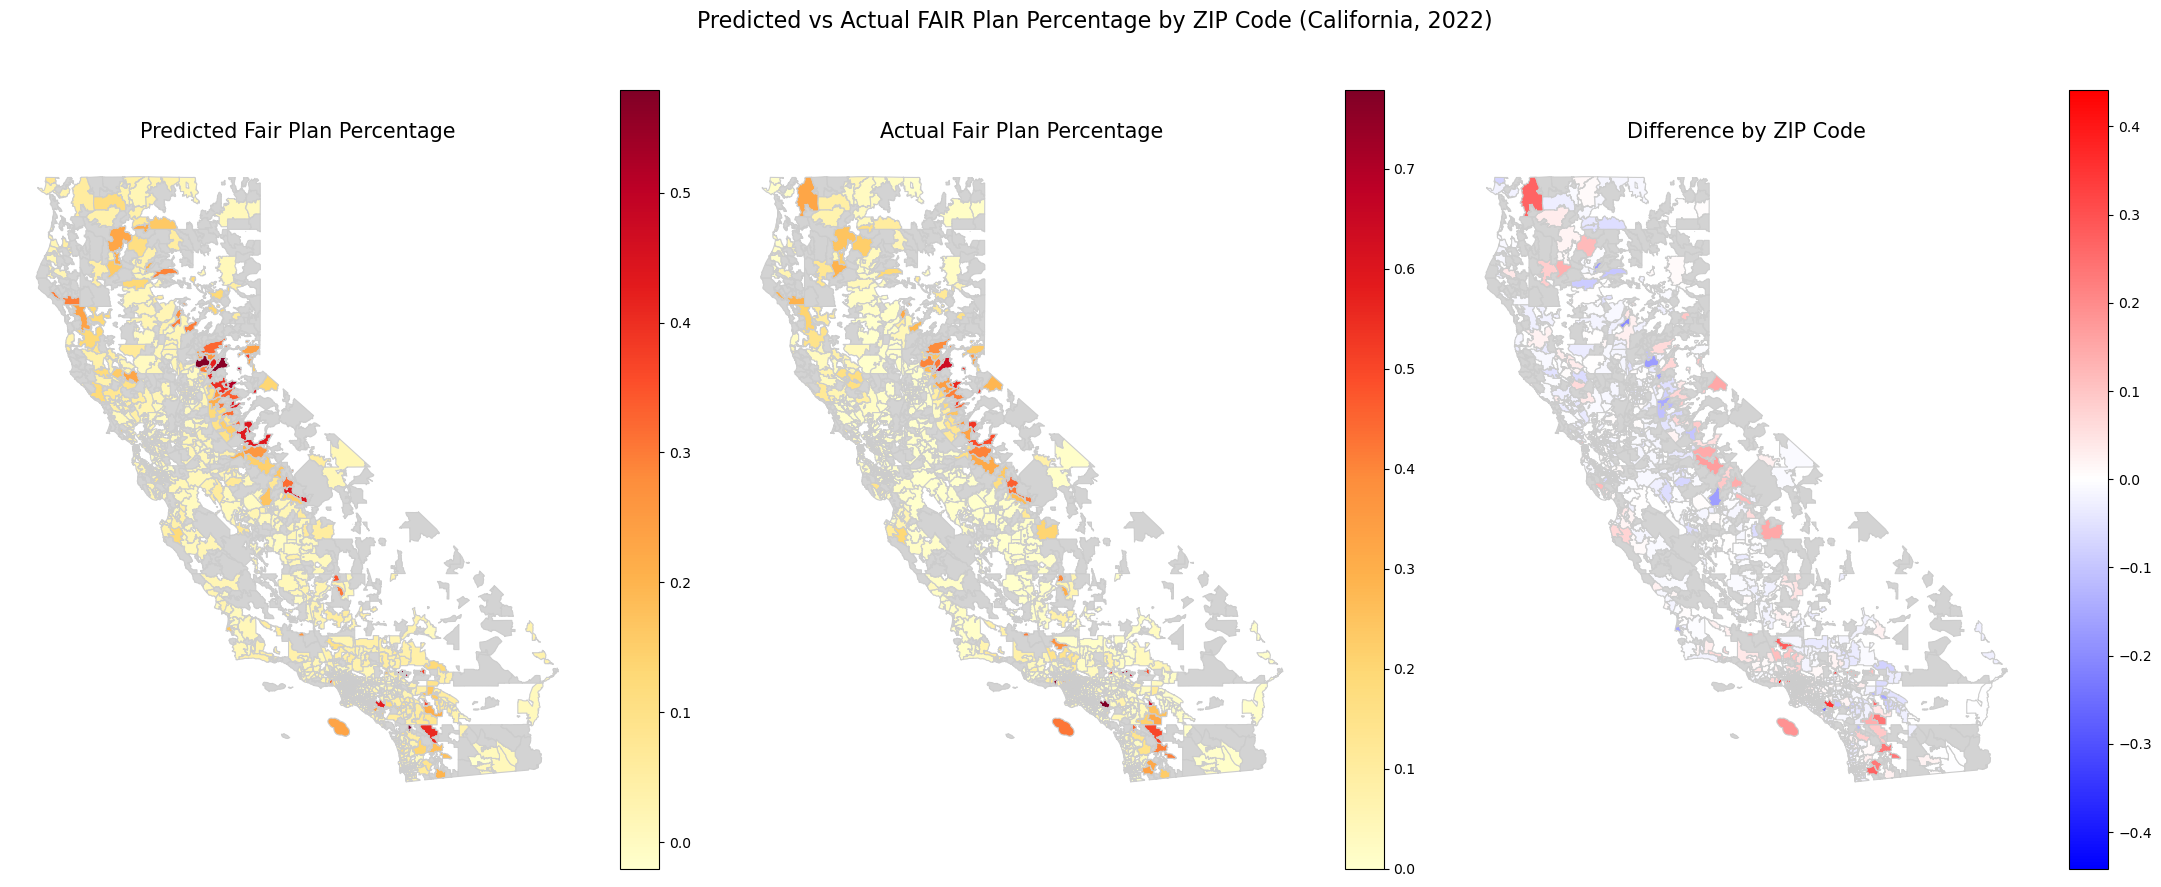

In [21]:

df["ZIP Code"] = df["ZIP Code"].astype(str).str.zfill(5)  # Ensure ZIPs are 5-digit strings

# Load ZIP code shapefile or GeoJSON
zip_geo = gpd.read_feather("clean_data/ca_zipcodes.feather")

# Merge your data with the shapefile
merged = zip_geo.merge(df, on="ZIP Code", how="left")

merged['Prediction Difference']= merged['% FAIR Plan Units'] - merged['Predictions (GB)']

vmax = merged["Prediction Difference"].abs().max()

# Plot the heatmap
fig, (ax1,ax2, ax3) = plt.subplots(1, 3, figsize=(22, 9))

merged.plot(column="Predictions (GB)",
            cmap="YlOrRd",
            linewidth=0.8,
            edgecolor="0.8",
            legend=True,
            ax=ax1,
            missing_kwds={
                "color": "lightgrey",
                "label": "No Data"
            })

ax1.set_title("Predicted Fair Plan Percentage", fontsize=15)
ax1.axis("off")

merged.plot(column="% FAIR Plan Units",
            cmap="YlOrRd",
            linewidth=0.8,
            edgecolor="0.8",
            legend=True,
            ax=ax2,
            missing_kwds={
                "color": "lightgrey",
                "label": "No Data"
            })

ax2.set_title("Actual Fair Plan Percentage", fontsize=15)
ax2.axis("off")

merged.plot(column="Prediction Difference",
            cmap="bwr",
            linewidth=0.8,
            edgecolor="0.8",
            legend=True,
            ax=ax3,
            vmax=vmax,
            vmin=-vmax,
            missing_kwds={
                "color": "lightgrey",
                "label": "No Data"
            })

ax3.set_title("Difference by ZIP Code", fontsize=15)
ax3.axis("off")


plt.suptitle("Predicted vs Actual FAIR Plan Percentage by ZIP Code (California, 2022)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


#### Exposure Analysis 2022

In [22]:
dfe = pd.merge(df1, df3, on='ZIP Code')

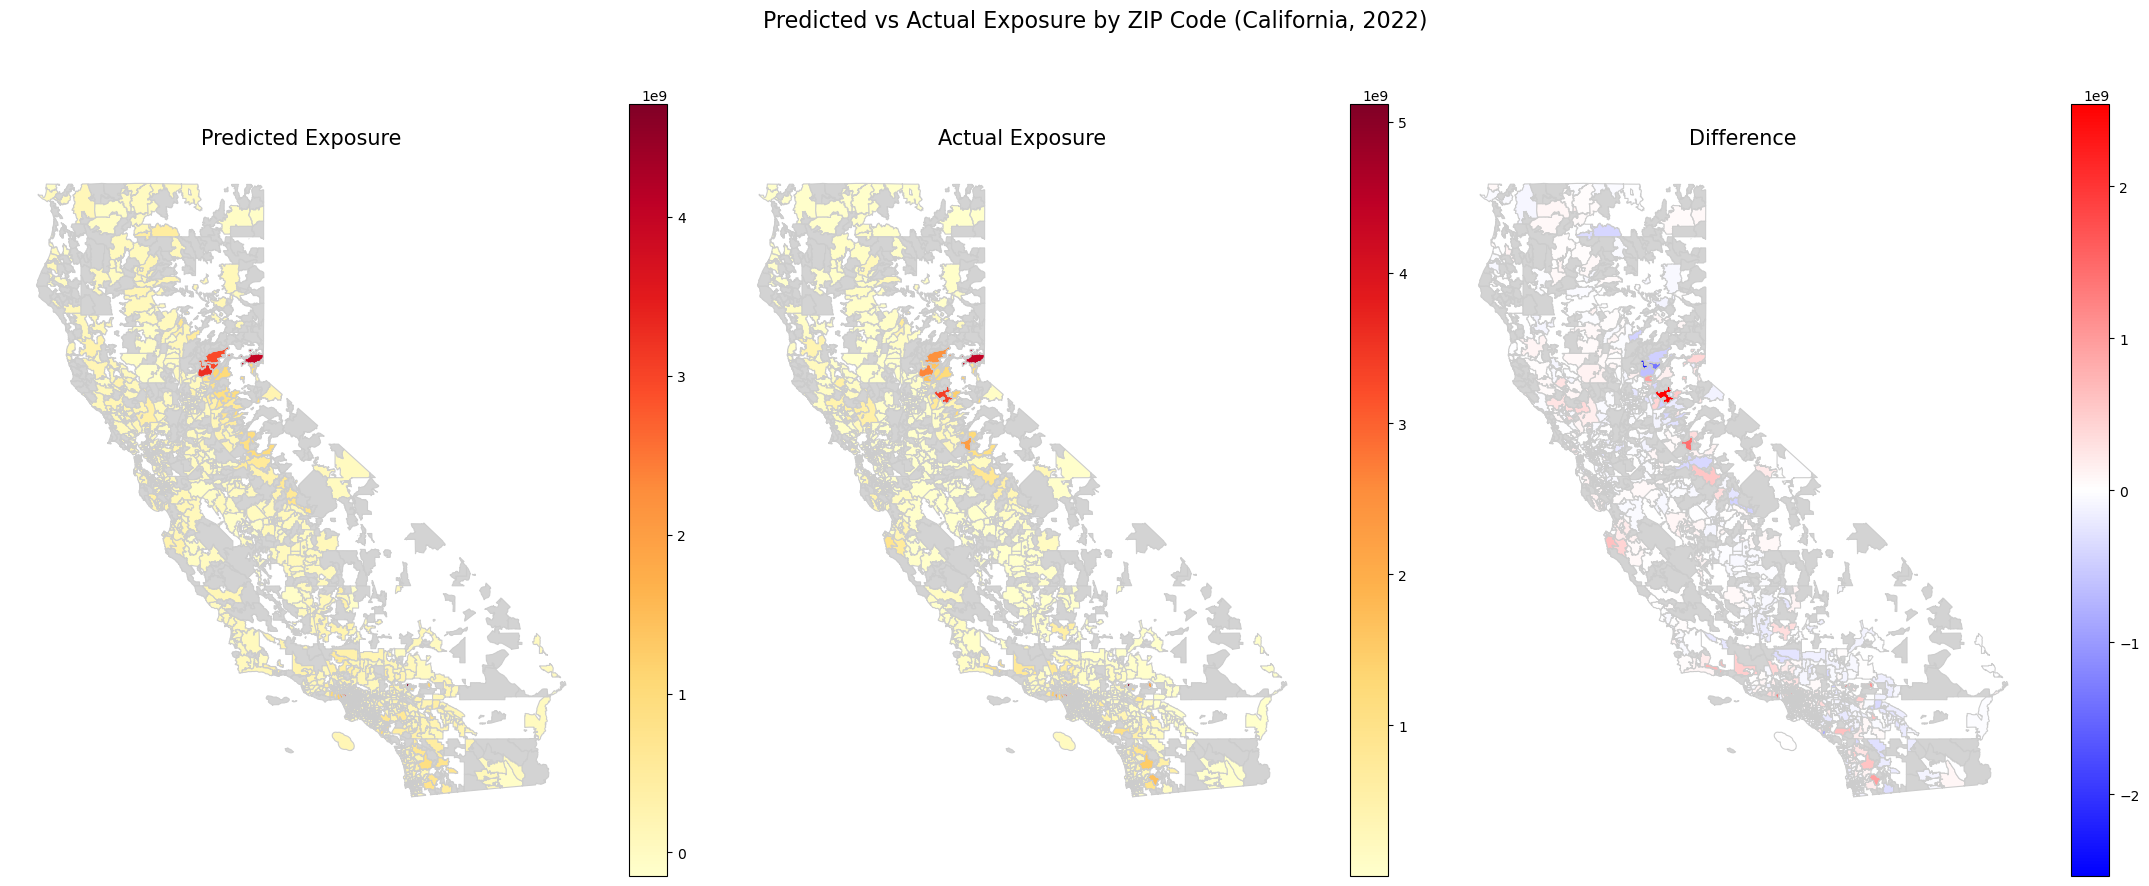

In [23]:
dfe["ZIP Code"] = dfe["ZIP Code"].astype(str).str.zfill(5)  # Ensure ZIPs are 5-digit strings

# Load ZIP code shapefile or GeoJSON
zip_geo = gpd.read_feather("clean_data/ca_zipcodes.feather")

# Merge your data with the shapefile
merged = zip_geo.merge(dfe, on="ZIP Code", how="left")

merged['Prediction Difference']= merged['True Value'] - merged['Predictions (GB)']

vmax = merged["Prediction Difference"].abs().max()

# Plot the heatmap
fig, (ax1,ax2, ax3) = plt.subplots(1, 3, figsize=(22, 9))

merged.plot(column="Predictions (GB)",
            cmap="YlOrRd",
            linewidth=0.8,
            edgecolor="0.8",
            legend=True,
            ax=ax1,
            missing_kwds={
                "color": "lightgrey",
                "label": "No Data"
            })

ax1.set_title("Predicted Exposure", fontsize=15)
ax1.axis("off")

merged.plot(column="True Value",
            cmap="YlOrRd",
            linewidth=0.8,
            edgecolor="0.8",
            legend=True,
            ax=ax2,
            missing_kwds={
                "color": "lightgrey",
                "label": "No Data"
            })

ax2.set_title("Actual Exposure", fontsize=15)
ax2.axis("off")

merged.plot(column="Prediction Difference",
            cmap="bwr",
            linewidth=0.8,
            edgecolor="0.8",
            legend=True,
            ax=ax3,
            vmax=vmax,
            vmin=-vmax,
            missing_kwds={
                "color": "lightgrey",
                "label": "No Data"
            })

ax3.set_title("Difference", fontsize=15)
ax3.axis("off")


plt.suptitle("Predicted vs Actual Exposure by ZIP Code (California, 2022)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

#### Main Model Features

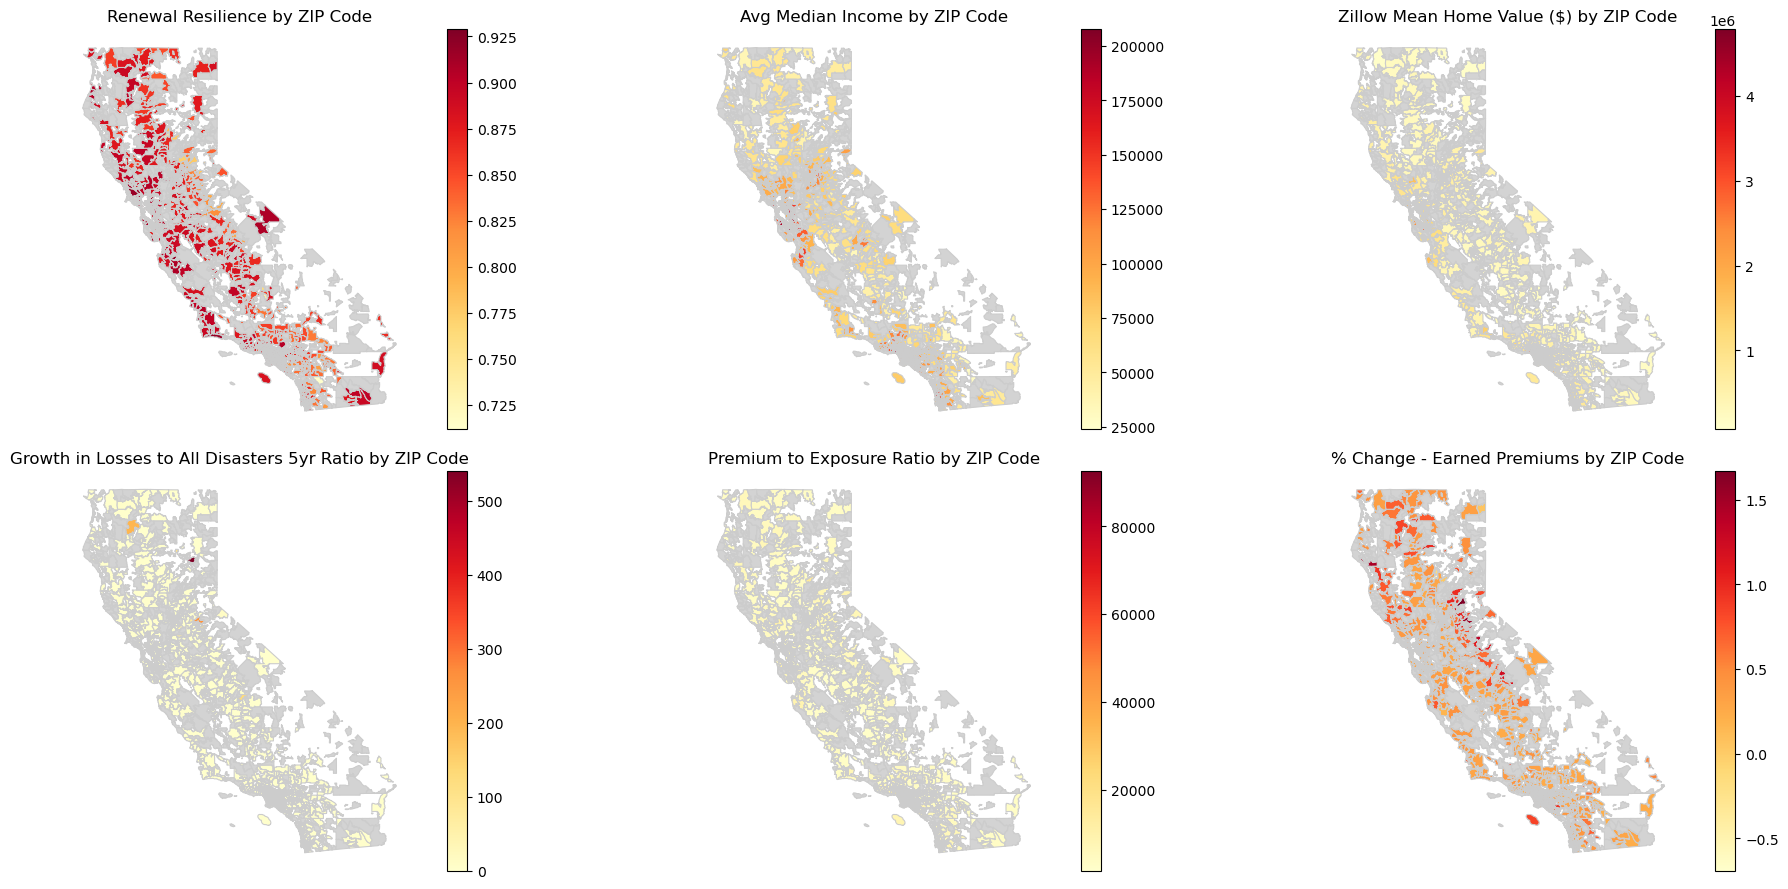

In [24]:
main_features = [
    'Renewal Resilience', 
    'Avg Median Income', 
    'Zillow Mean Home Value ($)',
    'Growth in Losses to All Disasters 5yr Ratio',
    'Premium to Exposure Ratio',
    '% Change - Earned Premiums'
]



# Create subplots
n = len(main_features)
fig, axes = plt.subplots(nrows=2, ncols=(n + 1) // 2, figsize=(20, 9))
axes = axes.flatten()

for i, feature in enumerate(main_features):
    ax = axes[i]
    

    merged.plot(
        column=feature,
        cmap='YlOrRd',
        linewidth=0.8,
        edgecolor="0.8",
        legend=True,
        ax=ax,
        missing_kwds={
            "color": "lightgrey",
            "label": "No Data"
        }
    )

    ax.set_title(f"{feature} by ZIP Code", fontsize=12)
    ax.axis("off")

# Remove extra axes if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Social Vulnerability Index

As a future direction, we perform preliminary analysis of how our predictions map into indices of social inequality. In particular, we use CDC's [Social Vulnerability Index (2022)](https://www.atsdr.cdc.gov/place-health/php/svi/svi-data-documentation-download.html) to examine how FAIR Plan expansion might benefit/impact different groups, comparing the estimates for the bottom and top 10% ZIP Code areas on California.

In [25]:
svi = pd.read_csv('raw_data/California_ZCTA_SVI_2022.csv')
df2=pd.read_csv("clean_data/best_predictions.csv")
df3=pd.read_csv("clean_data/exposure_predictions.csv")
df = pd.merge(df2, df3, on='ZIP Code')

svi = svi[['FIPS', 'SPL_THEMES']].rename(columns={'FIPS': 'ZIP Code'})
svi = svi[svi['SPL_THEMES'] > 0]

top10_thre = svi['SPL_THEMES'].quantile(0.1)
bottom10_thre = svi['SPL_THEMES'].quantile(0.9)

svi['SVI Top 10'] = np.where(svi['SPL_THEMES'] <= top10_thre, 1, 0)
svi['SVI Bottom 10'] = np.where(svi['SPL_THEMES'] >= bottom10_thre, 1, 0)

df = pd.merge(df, svi, on='ZIP Code')

In [26]:
cond1 = df['SVI Bottom 10'] == 1
cond2 = df['SVI Top 10'] == 1

# total exposure ($ mi)
total_exp_top10 = df.loc[cond2, 'Predictions (GB)_y'].sum() / (1000 * 1000)
total_exp_bot10 = df.loc[cond1, 'Predictions (GB)_y'].sum() / (1000 * 1000)

# mean_exposure ($ mi)
mean_exp_top10 = df.loc[cond2, 'Predictions (GB)_y'].mean() / (1000 * 1000)
mean_exp_bot10 = df.loc[cond1, 'Predictions (GB)_y'].mean() / (1000 * 1000)

# mean_fair_plan_coverage (%)
mean_fair_top10 = df.loc[cond2, 'Predictions (GB)_x'].mean()
mean_fair_bot10 = df.loc[cond1, 'Predictions (GB)_x'].mean()

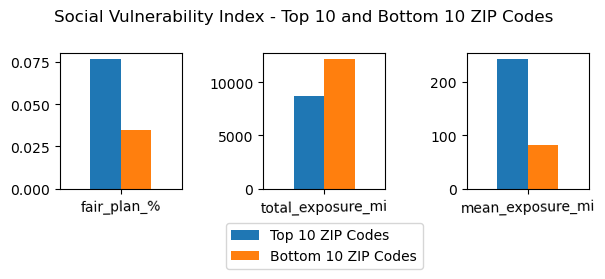

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(6, 3))

pd.DataFrame({
    'fair_plan_%': [mean_fair_top10, mean_fair_bot10],
}, index=['Top 10 ZIP Codes', 'Bottom 10 ZIP Codes']).T.plot.bar(ax=axes[0], rot=True, legend=False)

pd.DataFrame({

    'total_exposure_mi': [total_exp_top10, total_exp_bot10]
}, index=['Top 10 ZIP Codes', 'Bottom 10 ZIP Codes']).T.plot.bar(ax=axes[1], rot=True)

pd.DataFrame({
    'mean_exposure_mi': [mean_exp_top10, mean_exp_bot10],
}, index=['Top 10 ZIP Codes', 'Bottom 10 ZIP Codes']).T.plot.bar(ax=axes[2], rot=True, legend=False)

axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=1)
plt.suptitle('Social Vulnerability Index - Top 10 and Bottom 10 ZIP Codes')

fig.tight_layout()
plt.show()
